In [6]:
from keras import layers
from keras import models
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [11]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 29s 31ms/step - loss: 0.1725 - accuracy: 0.9455
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0461 - accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0312 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 29s 30ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0187 - accuracy: 0.9938


In [7]:
tes_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0312 - accuracy: 0.9912


0.9911999702453613

In [8]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model_no_max_pool.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________




컨브넷 훈련하기



In [12]:
import os, shutil

In [13]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)


# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [7]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [8]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [9]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [10]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [11]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, # 타깃 디렉터리
                                                   target_size=(150, 150), # 모든 이미지를 150x150 크기로 바꿉니다.
                                                   batch_size=20, 
                                                    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [17]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator,
                             validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 73s 731ms/step - loss: 0.6908 - acc: 0.5255 - val_loss: 0.6707 - val_acc: 0.6110
Epoch 2/30
100/100 [==============================] - 62s 624ms/step - loss: 0.6623 - acc: 0.6130 - val_loss: 0.6872 - val_acc: 0.5630
Epoch 3/30
100/100 [==============================] - 63s 626ms/step - loss: 0.6156 - acc: 0.6610 - val_loss: 0.6383 - val_acc: 0.6240
Epoch 4/30
100/100 [==============================] - 62s 619ms/step - loss: 0.5667 - acc: 0.7035 - val_loss: 0.5961 - val_acc: 0.6660
Epoch 5/30
100/100 [==============================] - 62s 620ms/step - loss: 0.5379 - acc: 0.7340 - val_loss: 0.5842 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 64s 637ms/step - loss: 0.5095 - acc: 0.7455 - val_loss: 0.6392 - val_acc: 0.6440
Epoch 7/30
100/100 [==============================] - 62s 622ms/step - loss: 0.4742 - acc: 0.7775 - val_loss: 0.57

In [18]:
model.save('cats_and_dogs_small_1.h5')

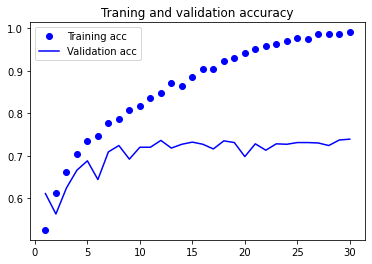

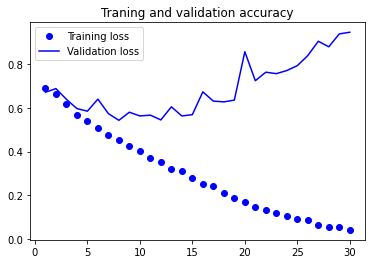

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [20]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
                            shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

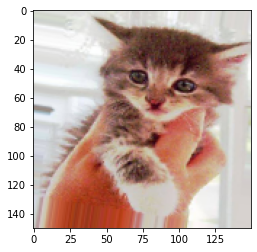

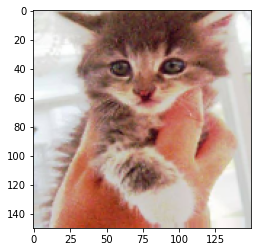

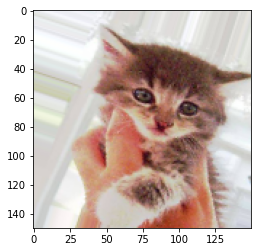

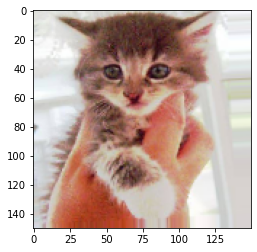

In [24]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지를 선택합니다.
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다.
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다.
x = image.img_to_array(img)
# (1, 150, 150, 3) 크기로 변환합니다.
x = x.reshape((1, ) + x.shape)

# 랜덤하게 변환된 이미지 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다.
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [24]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                            shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# 검증 데이터는 증식되어서는 안됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   # 모든 이미지를 150x150 크기로 바꿉니다.
                                                   target_size=(150, 150), batch_size=32,
                                                    # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다.
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                       batch_size=32, class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=50, epochs=100, validation_data=validation_generator,
                             validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
50/50 [==============================] - 45s 893ms/step - loss: 0.6925 - accuracy: 0.5170 - val_loss: 0.6869 - val_accuracy: 0.5090
Epoch 2/100
50/50 [==============================] - 39s 789ms/step - loss: 0.6889 - accuracy: 0.5227
Epoch 3/100
50/50 [==============================] - 45s 891ms/step - loss: 0.6835 - accuracy: 0.5480
Epoch 4/100
50/50 [==============================] - 43s 852ms/step - loss: 0.6712 - accuracy: 0.5953
Epoch 5/100
50/50 [==============================] - 40s 803ms/step - loss: 0.6681 - accuracy: 0.5890
Epoch 6/100
50/50 [==============================] - 42s 834ms/step - loss: 0.6634 - accuracy: 0.6067
Epoch 7/100
50/50 [==============================] - 44s 887ms/step - loss: 0.6571 - accuracy: 0.6010
Epoch 8/100
50/50 [==============================] - 42s 842ms/step - loss: 0.6430 - accuracy: 0.6414
Epoch 9/100
50/50 [==============================] - 53s 1

50/50 [==============================] - 38s 770ms/step - loss: 0.4699 - accuracy: 0.7702
Epoch 77/100
50/50 [==============================] - 42s 832ms/step - loss: 0.4764 - accuracy: 0.7765
Epoch 78/100
50/50 [==============================] - 39s 777ms/step - loss: 0.4569 - accuracy: 0.7910
Epoch 79/100
50/50 [==============================] - 40s 799ms/step - loss: 0.4771 - accuracy: 0.7670
Epoch 80/100
50/50 [==============================] - 40s 810ms/step - loss: 0.4596 - accuracy: 0.7860
Epoch 81/100
50/50 [==============================] - 39s 774ms/step - loss: 0.4652 - accuracy: 0.7765
Epoch 82/100
50/50 [==============================] - 39s 775ms/step - loss: 0.4407 - accuracy: 0.8037
Epoch 83/100
50/50 [==============================] - 39s 780ms/step - loss: 0.4438 - accuracy: 0.7879
Epoch 84/100
50/50 [==============================] - 39s 775ms/step - loss: 0.4329 - accuracy: 0.7835
Epoch 85/100
50/50 [==============================] - 39s 773ms/step - loss: 0.4658 - 

In [28]:
model.save('cats_and_dogs_small_2.h5')

In [31]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 6s 0us/step


In [32]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     



데이터 증식을 사용하지 않는 빠른 특성 추출



In [34]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어 내므로 모든 이미지를 한 번씩 처리하고 나면 중지됩니다.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [36]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20,
                   validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 33ms/step - loss: 0.5969 - accuracy: 0.6805 - val_loss: 0.4560 - val_accuracy: 0.8260
Epoch 2/30
100/100 [==============================] - 3s 33ms/step - loss: 0.4382 - accuracy: 0.7945 - val_loss: 0.3670 - val_accuracy: 0.8700
Epoch 3/30
100/100 [==============================] - 3s 32ms/step - loss: 0.3596 - accuracy: 0.8490 - val_loss: 0.3230 - val_accuracy: 0.8860
Epoch 4/30
100/100 [==============================] - 3s 33ms/step - loss: 0.3191 - accuracy: 0.8635 - val_loss: 0.3012 - val_accuracy: 0.8940
Epoch 5/30
100/100 [==============================] - 3s 32ms/step - loss: 0.2961 - accuracy: 0.8725 - val_loss: 0.2880 - val_accuracy: 0.8950
Epoch 6/30
100/100 [==============================] - 3s 33ms/step - loss: 0.2643 - accuracy: 0.8915 - val_loss: 0.2743 - val_accuracy: 0.9010
Epoch 7/30
100/100 [==============================] - 4s 35ms/step - loss: 0.2473 - accuracy: 0.9065 - val_loss: 0.2662 - val_accuracy: 0.9010

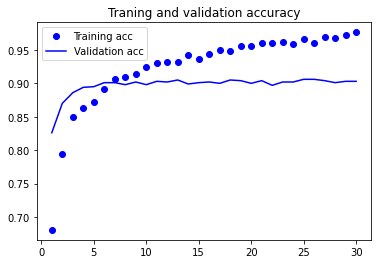

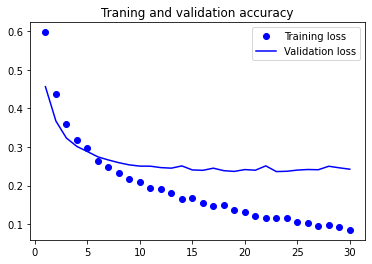

In [38]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation accuracy')
plt.legend()

plt.show()

In [80]:
from keras import models
from keras import layers
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30


In [81]:
conv_base.trainable = False

In [21]:
print('conv_base를 동결한 후 훈련되는 가중치의 수:', len(model.trainable_weights))

conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [82]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.1,
                                   height_shift_range=0.1, shear_range=0.1,
                                   zoom_range=0.1, horizontal_flip=True,
                                   fill_mode='nearest')

# 검증 데이터는 증식되어서는 안됩니다.
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(train_dir, #  타깃 디렉터리
                                                    #모든 이미지의 크기를 150x150으로 변경합니다.
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다.
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                                target_size=(150, 150),
                                                                batch_size=20,
                                                                class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50, verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30


KeyboardInterrupt: 

In [49]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [50]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc'))
plt.title('Training and validation accuracy')
plt.legend()

plt.figure

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss'))
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

In [29]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [30]:
img_path = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
# 이미지를 4D 텐서로 변경합니다.
img_tensor = np.expand_dims(img_tensor, axis=0)
# 모델이 훈련될 대 입력에 적용한 전처리 방식을 동일하게 사용합니다.
img_tensor /= 255. 

# 이미지 텐서의 크기는 (1, 150, 150, 3)입니다.
print(img_tensor.shape)

(1, 150, 150, 3)


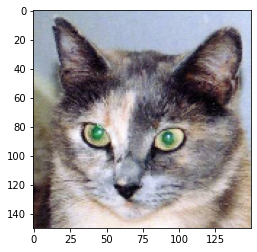

In [31]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [33]:
from keras import models

# 상위 8개 층의 출력을 추출합니다.
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, # 입력에 대해 8개 층의 출력을 반환하는 모델을 만듭니다.
                               outputs=layer_outputs)

In [34]:
# 층의 활성화마다 하나씩 8개의 넘파이 배열로 이루어진 리스트를 반환합니다.
activations = activation_model.predict(img_tensor)

In [36]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


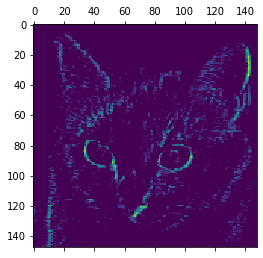

In [37]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')

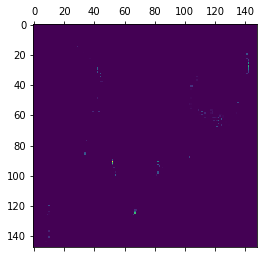

In [38]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

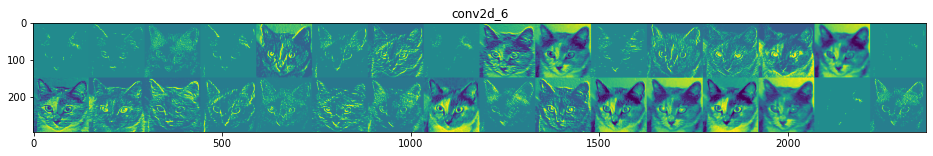

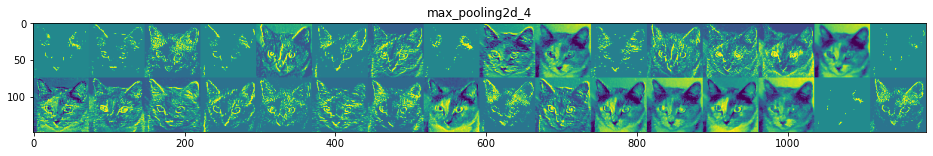

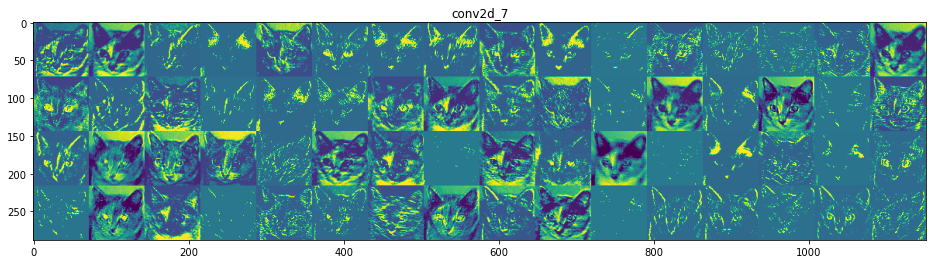

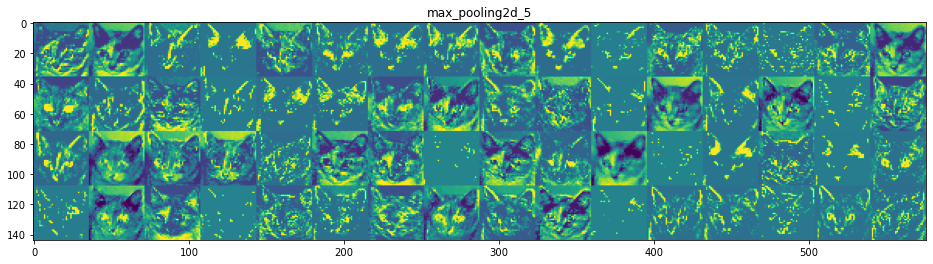

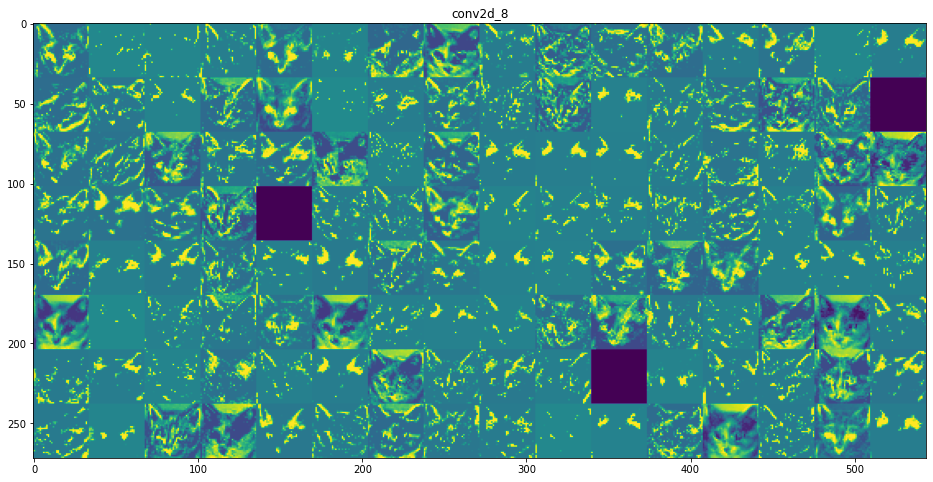

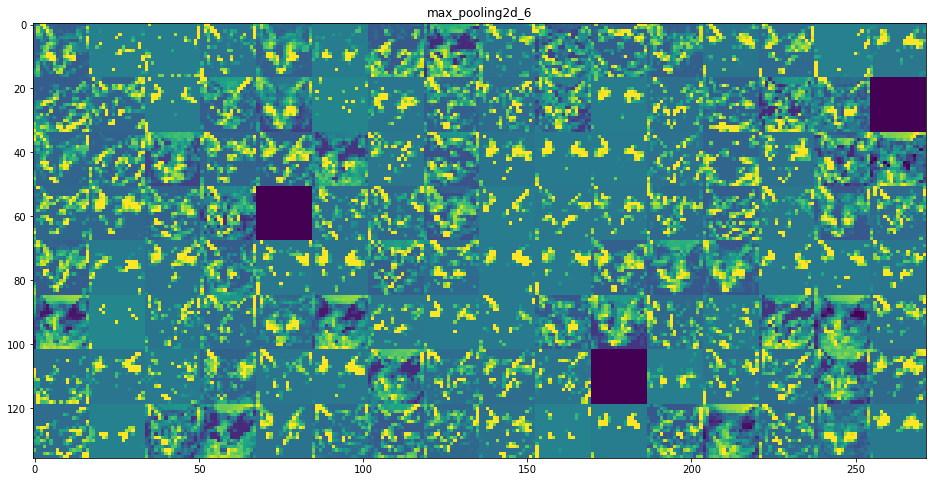

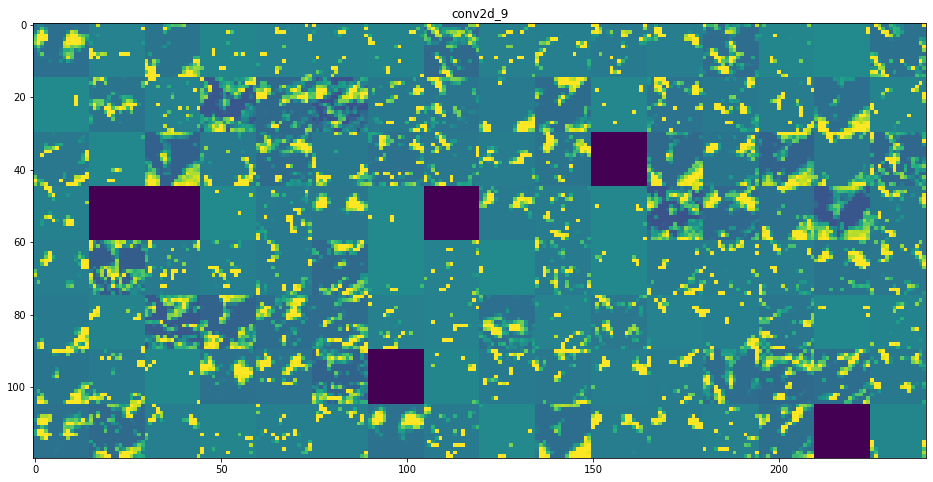

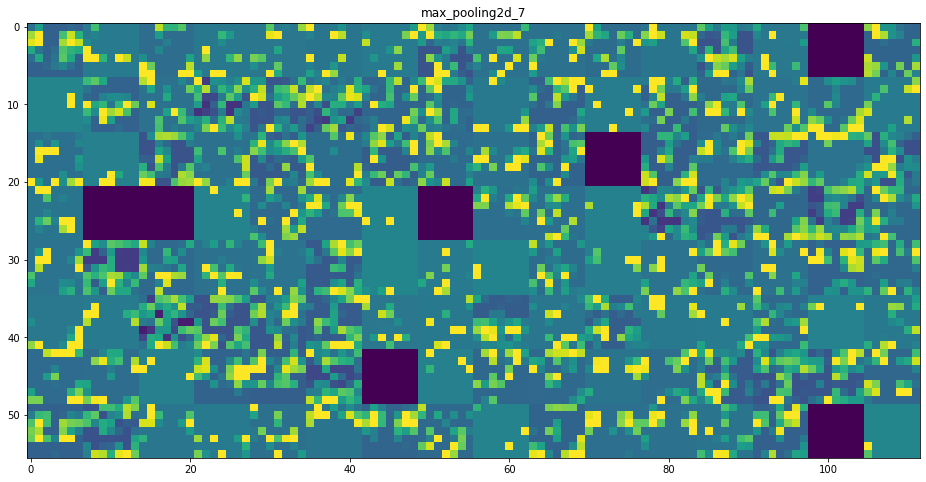

In [41]:
# 층의 이름을 그래프 제목으로 사용합니다.
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# 특성 맵을 그립니다.
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]
    
    # 특성 맵의 크기는 (1, size, size, n_features)입니다.
    size = layer_activation.shape[1]
    
    # 활성화 채널을 위한 그리드 크기를 구합니다.
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    # 각 활성화를 하나의 큰 그리드에 채웁니다.
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리합니다.
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            # 그리드를 출력합니다.
            display_grid[col * size : (col + 1) * size, 
                        row * size : (row + 1) * size] = channel_image
        
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                       scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()



컨브넷 필터 시각화 하기

In [55]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [56]:


# gradients 합수가 반환하는 텐서 리스트(여기에서는 크기가 1인 리스트)에서 첫 번째 텐서를 추출합니다.
grads = K.gradients(loss, model.input)[0]

 # 그래디언트 정규화
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# 입력 이미지에 대한 손실과 그래디언트를 반환합니다
iterate = K.function([model.input], [loss, grads])

# 잡음이 섞인 회색 이미지로 시작합니다
input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

In [57]:
import numpy as np

loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [59]:
step = 1. # 업데이트할 그래디언트의 크기

# 경사 상승법을 40회 실행합니다.
for i in range(40):
    # 손실과 그래디언트를 계산합니다.
    loss_value, grads_value = iterate([input_img_data])
    # 손실을 최대화하는 방향으로 입력 이미지를 수정합니다.
    input_img_data += grads_value * step

In [60]:
def deprocess_image(x):
    # 텐서의 평균이0, 표준편차가 0.1이 되도록 정규화 합니다.
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    # [0, 1]로 클리핑합니다.
    x += 0.5
    x = np.clip(x, 0, 1)
    
    # RGB 배열로 변환합니다.
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [63]:
def generate_pattern(layer_name, filter_index, size=150):
    # 주어진 층과 필터의 활성화를 최대화하기 위한 손실 함수를 정의합니다.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # 손실에 대한 입력 이미지의 그래디언트를 계산합니다.
    grads = K.gradients(loss, model.input)[0]
    
    # 그래디언트 정규화
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    # 입력 이미지에 대한 손실과 그래디언트를 반환합니다.
    iterate = K.function([model.input], [loss, grads])
    
    # 잡음이 섞인 회색 이미지로 시작합니다.
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1
    
    # 경사 상승법을 40단계 실행합니다.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

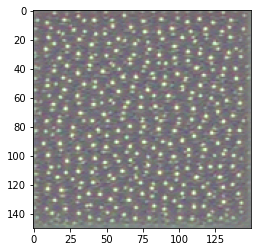

In [64]:
plt.imshow(generate_pattern('block3_conv1', 0))

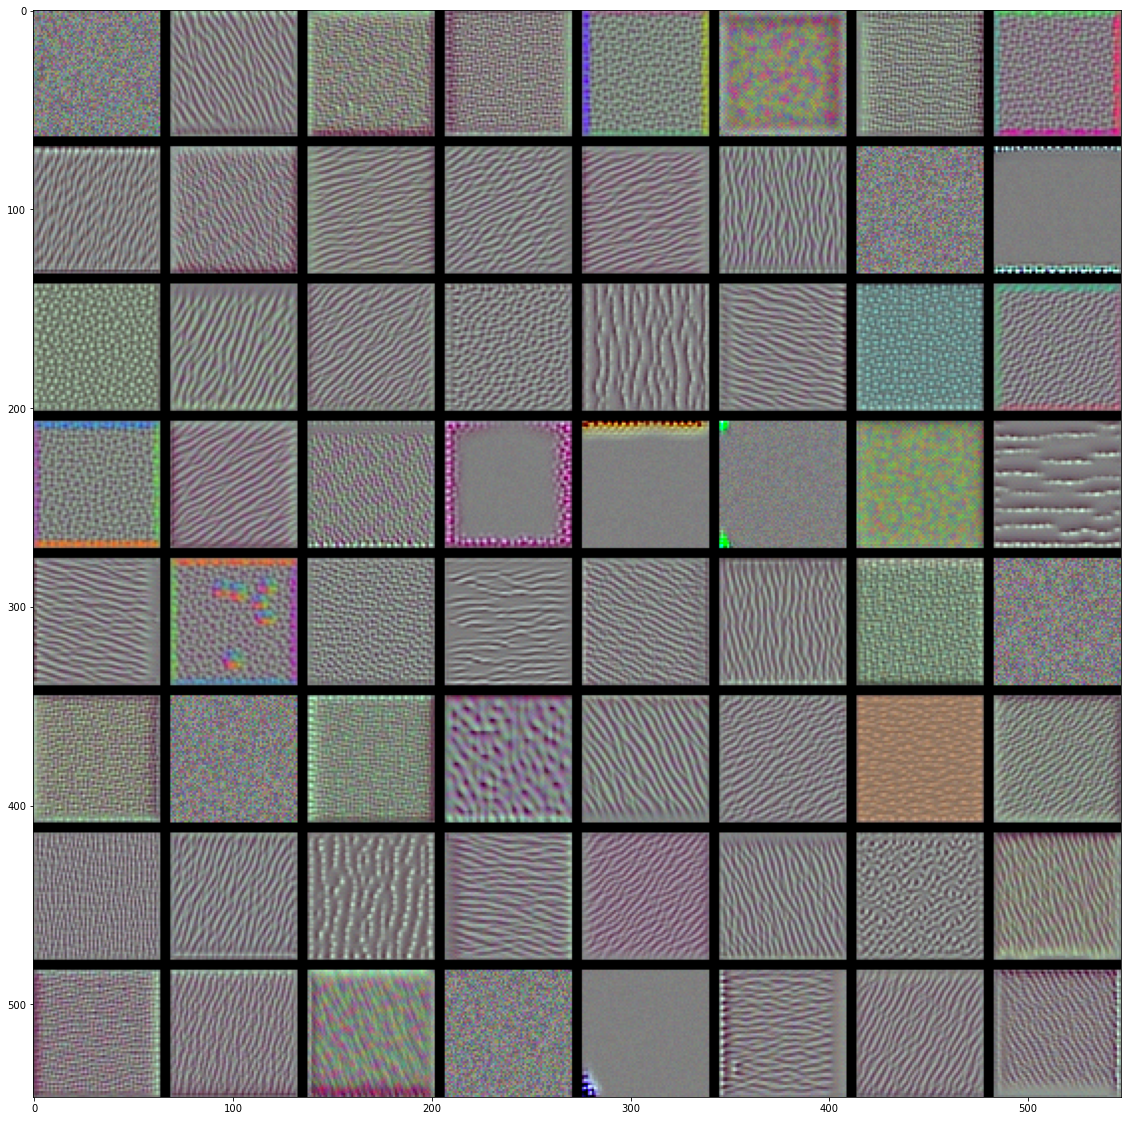

In [68]:
layer_name = 'block2_conv1'
size = 64
margin = 5

# 결과를 담을 빈 (검은)이미지
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype='uint8')

#results 그리드 행을 반복합니다.
for i in range(8):
    #results 그리드 열을 반복합니다.
    for j in range(8):
        # layer_name에 있는 i + (j * 8)번째 필터에 대한 패턴을 생성합니다.
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        
        # result 그리드의 (i, j)번째 위치에 저장합니다.
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start : horizontal_end,
               vertical_start : vertical_end, :] = filter_img
        
# results 그리드를 그립니다.
plt.figure(figsize=(20, 20))
plt.imshow(results)

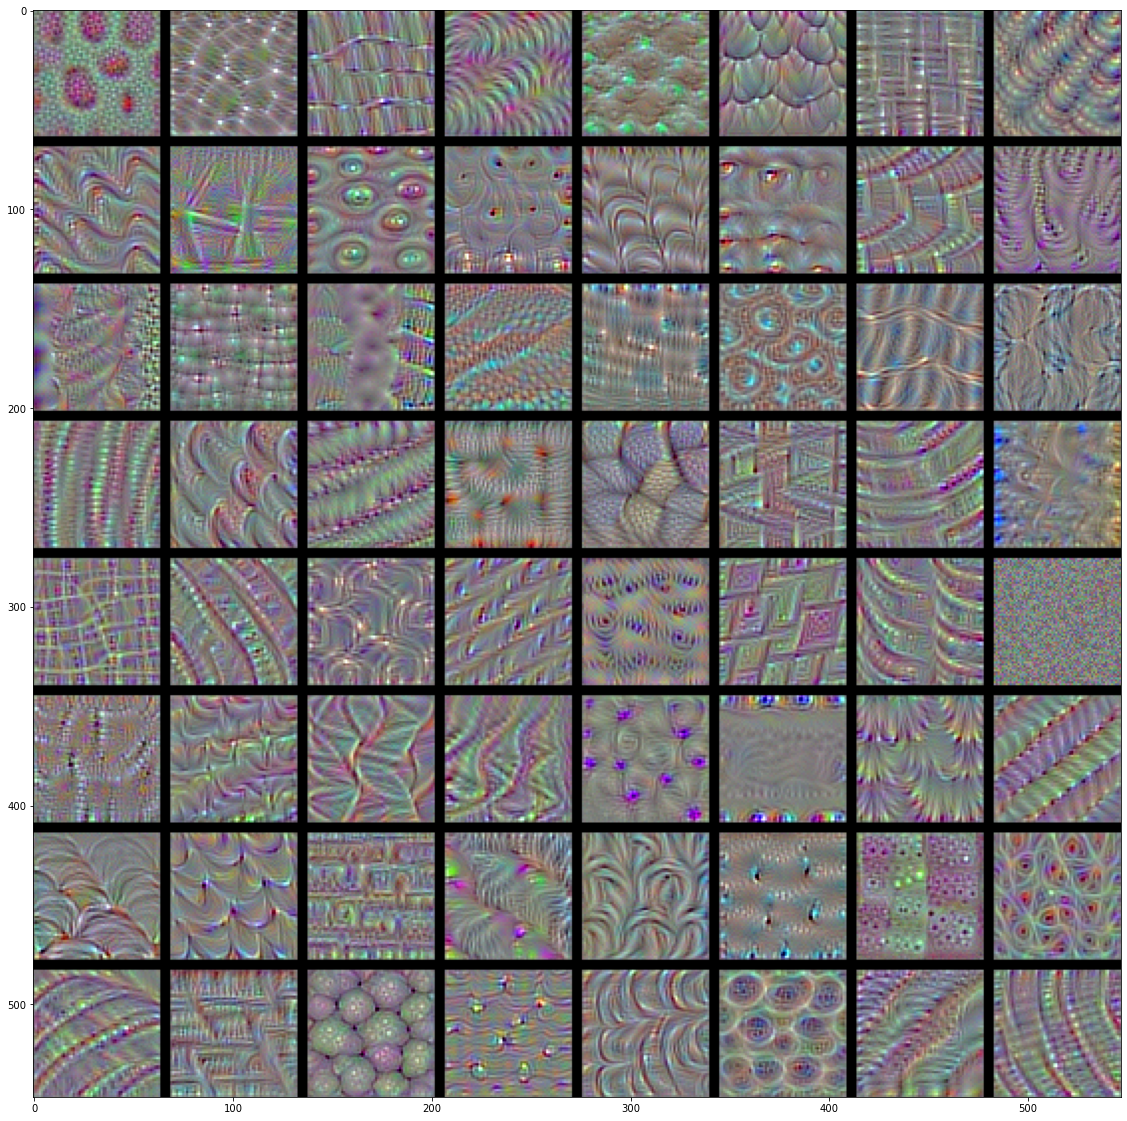

In [69]:
layer_name = 'block4_conv1'
size = 64
margin = 5

# 결과를 담을 빈 (검은)이미지
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype='uint8')

#results 그리드 행을 반복합니다.
for i in range(8):
    #results 그리드 열을 반복합니다.
    for j in range(8):
        # layer_name에 있는 i + (j * 8)번째 필터에 대한 패턴을 생성합니다.
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        
        # result 그리드의 (i, j)번째 위치에 저장합니다.
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start : horizontal_end,
               vertical_start : vertical_end, :] = filter_img
        
# results 그리드를 그립니다.
plt.figure(figsize=(20, 20))
plt.imshow(results)

In [70]:
from keras.applications.vgg16 import VGG16

# 이전 모든 예제에서는 최상단의 완전 연결 분류기를 제외했지만, 여기서는 포함합니다.
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 50s 0us/step


In [71]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# 이미지 경로
img_path = 'C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/creative_commons_elephant.jpg'

# 224x224 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다.
img = image.load_img(img_path, target_size=(224, 224))
# (224, 224, 3)크기의 넘파이 float32 배열
x = image.img_to_array(img)
# 차원을 추가하여 (1, 224, 224, 3) 크기의 배치로 배열을 변환합니다.
x = np.expand_dims(x, axis=0)
# 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다.)
x = preprocess_input(x)

In [72]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
40960/35363 [==================================] - 0s 1us/step
Predicted: [('n02504458', 'African_elephant', 0.909421), ('n01871265', 'tusker', 0.086182885), ('n02504013', 'Indian_elephant', 0.0043545826)]


In [73]:
np.argmax(preds[0])

386

In [76]:
# 예측 벡터의 '아프리카 코끼리'항목
african_elephant_output = model.output[:, 386]

# VGG16의 마지막 합성곱 층인 block5_conv3 층의 특성 맵
last_conv_layer = model.get_layer('block5_conv3')

# block5_conv3의 특성 맵 출력에 대한 '아프리카 코끼리'클래스의 그래디언트
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

#특성 맵 채널별 그래디언트 평균값이 담긴 (512, )크기의 벡터
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# 샘플 이미지가 주어졌을 때 방금 전 정의한 pooled_prads와 block5_conv3의 특성 맵 출력을 구합니다.
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# 두 마리 코끼리가 있는 샘플 이미지를 주입하고 2개의 넘파이 배열을 얻습니다.
pooled_grads_value, conv_layer_output_value = iterate([x])

# "아프리카 코끼리" 클래스에 대한 "채널의 중요도"를 특성 맵 배열의 채널에 곱합니다.
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
# 만들어진 특성 맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵입니다.
heatmap = np.mean(conv_layer_output_value, axis=-1)

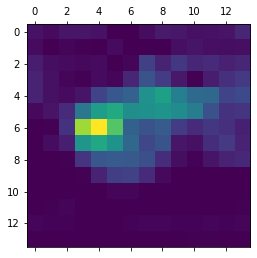

In [77]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [79]:
import cv2

# cv2 모듈을 사용하여 원본 이미지를 로드합니다.
img = cv2.imread(img_path)
# heatmap을 원본 이미지 크기에 맞게 변경합니다.
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# heatmap을 RGB 포맷으로 변환합니다.
heatmap = np.uint8(255 * heatmap)
# 히트맵으로 변환합니다.
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# 0.4는 히트맵의 강도입니다.
superimposed_img = heatmap * 0.4 + img
# 디스크에 이미지를 저장합니다.
cv2.imwrite('C:/Users/iws1/Downloads/deep-learning-with-python-notebooks-master/datasets/elephant_cam.jpg', superimposed_img)

True